#     超市零售商品数据分析

## 1.背景与需求

本文主要对一家超市2018年6月1日到2018年7月5日商品的销售数据进行销售情况分析、商品情况分析和用户情况分析，并给出提升销量的建议。<br/>
其中销售情况分析包括销售额、销量、和市场布局等情况分析；<br/>
商品情况分析包括优势商品等情况分析；<br/>
用户情况分析包括客户数量、新老客户、客单价、RFM模型、复购率和回购率等情况分析。

## 2.数据预处理

### 2.1导入模块

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams["font.sans-serif"]=['SimHei']#用来正常显示中文标签  
plt.rcParams["axes.unicode_minus"]=False#用来正常显示负号 

### 2.2导入数据和数据预处理

#### 2.2.1basket数据

导入数据

In [4]:
basket = pd.read_csv('D:/Learn/课程/第三学期/python数学运算与数据可视化/大作业/数据/Basket.csv')
basket['SDATE']=pd.to_datetime(basket['SDATE'])
basket.isnull().any()

SDATE         False
STORE_CODE    False
POS_NO        False
BASK_CODE     False
BASK_SPEND    False
dtype: bool

异常值检测

In [5]:
spend=basket['BASK_SPEND']

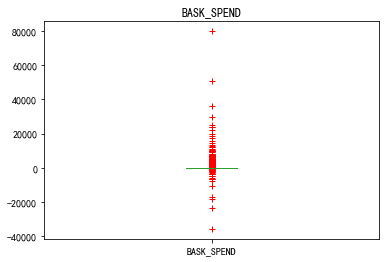

In [6]:
spend.plot(kind='box',title='BASK_SPEND',sym='r+')   #从箱线图可以看出有销售金额小于0和远大于平均值的异常值

In [7]:
spend.describe()

count    571552.000000
mean         38.973310
std         209.038276
min      -35940.000000
25%           9.000000
50%          19.900000
75%          44.700000
max       79920.000000
Name: BASK_SPEND, dtype: float64

删除异常值

In [8]:
basket_new1=basket[basket['BASK_SPEND']>0]  #剔除basket中bask_spend列小于0的行
basket_new1.head()

,SDATE,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.0
1,2018-06-01,D007,3,250200,32.7
2,2018-06-01,D007,1,161068,16.8
3,2018-06-01,D007,8,5325,30.4
4,2018-06-01,D007,8,5361,191.3


In [9]:
basket_new2=basket_new1[basket_new1['BASK_SPEND']<80]   #剔除basket中bask_spend列大于80的行

In [10]:
basket_new2.duplicated().sum()#查看是否有重复值

0

#### 2.2.2item数据

导入数据

In [11]:
item = pd.read_csv('D:/Learn/课程/第三学期/python数学运算与数据可视化/大作业/数据/item.csv')
item['SDATE']=pd.to_datetime(item['SDATE'])
item.isnull().any()

SDATE              False
STORE_CODE         False
POSID              False
BASK_CODE          False
PROD_CODE          False
ITEM_QUANTITY      False
ITEM_SPEND         False
NORMAL_PRICE       False
DISCOUNT_TYPE      False
DISCOUNT_AMOUNT    False
dtype: bool

In [12]:
item.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


从数据分布情况表可以看出：<br/>
1.ITEM_SPEND字段有负值，即商品实付金额为负，存在异常值；<br/>
2.ITEM_QUANTITY字段有负值，即商品数量为负，存在异常值；<br/>
3.DISCOUNT_AMOUTN字段数据有正值，即折扣后金额比折扣前金额高，存在异常值。

In [13]:
item_new1=item[item['ITEM_SPEND']>0] #剔除item中ITEM_SPEND列小于0的行
item_new1=item_new1[item_new1['ITEM_QUANTITY']>0]#剔除item中ITEM_QUANTITY列小于0的行
item_new1=item_new1[item_new1['DISCOUNT_AMOUNT']<=0]#剔除item中DISCOUNT_AMOUNT列大于0的行
item_new1.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


In [14]:
item_new1.duplicated().sum()#查看是否有重复值

212634

In [16]:
item_new2 = item_new1.drop_duplicates(keep='first')#去掉重复行，并保留重复出现的行中第一次出现的行
item_new2.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


## 3.销售额分析

### 3.1商店销售额分析

计算各门店的销售总额，并将结果排序

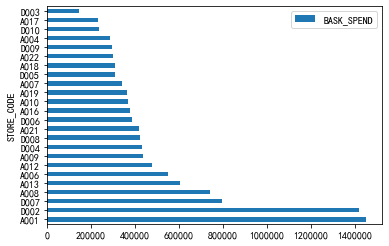

In [17]:
a=basket_new2.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False)#商店按消费额大小排序
a.set_index('STORE_CODE',inplace=True)
a.plot(kind='barh')                       #从条形图可以看出A001商店的销售额最大

由上表以及上图可以看出:
1.A001门店以及D002门店的销售额远远超于其他门店的销售额，并且两门店的销售总额占到所有门店销售总额的30%；<br/>
2.D010以及D003门店销售额较低值得警惕。<br/>

汇总各门店的结账频数，并按从大到小的顺序进行排列

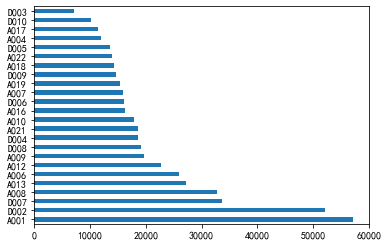

In [18]:
b=basket_new2.loc[:,'STORE_CODE'].value_counts()#商店按结账次数大小排序
b.plot(kind='barh')       #A001商店的结账次数也最大

综合对比各门店的结账次数以及销售总额柱状图可以发现，结账的次数与销售额是成正比的。<br/>
由此可以分析出零售产业通过吸引更多的顾客来增加销售额是一种非常有效的手段。

In [18]:
#将时间拆分成年月方便根据时间对商店的销售额进行分析
basket_new2['year'] = basket_new2['SDATE'].dt.year          
basket_new2['month'] = basket_new2['SDATE'].dt.month
basket_new2['day']= basket_new2['SDATE'].values.astype('datetime64[D]')#方便后续的分析，新增加年份列和月份列

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [19]:
#按照年份、月份对销售子数据集进行分组求和
sales_month = basket_new2[['SDATE','BASK_SPEND','month']]
sales_month = sales_month.groupby(['month','SDATE']).sum()
sales_month.head()

BASK_SPEND
month SDATE                 
6     2018-06-01   372014.79
      2018-06-02   384824.51
      2018-06-03   358051.25
      2018-06-04   306442.13
      2018-06-05   334589.50

In [20]:
# 整体销售情况子数据集，包含下单日期、销售额、年份、月份信息
sales_data = basket_new2[['SDATE','BASK_SPEND','month','day']]
#按照年份、月份对销售子数据集进行分组求和
sales_month = sales_data.groupby(['month','day']).sum()
sales_month.style.background_gradient()# 颜色越深，销售额越高
#按周六日呈周期性递增态势

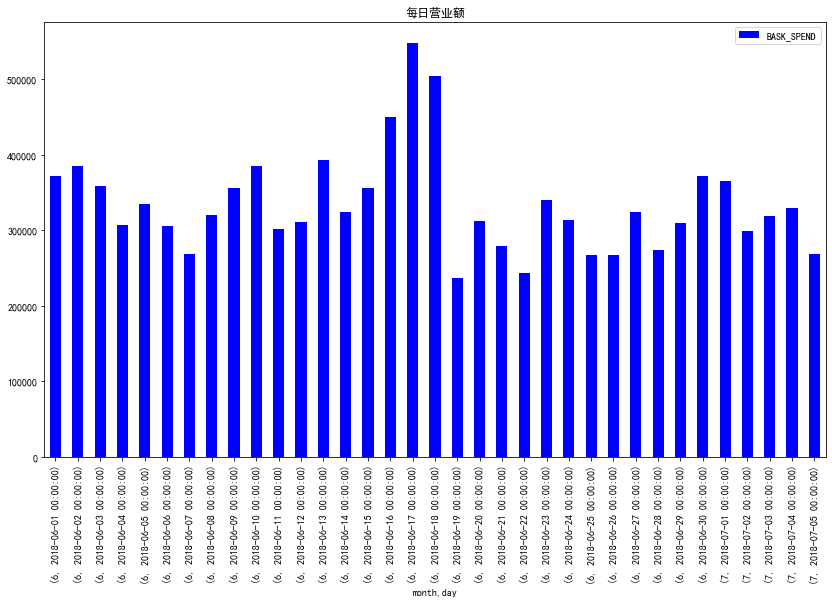

In [21]:
sales_month.plot(kind='bar',color="blue",title="每日营业额",figsize=(14,8))

由上图可以看出2018年6月16日-2018年6月18日的销售额明显高于其他日期的销售额，并在6月17日这天销售额最高，经查阅日历发现，2018年6月16日-2018年6月18日为三天端午假期，并且6月18日为端午节，大家多会提前一天前往商场采购端午节家庭聚餐所需要的食材或者走亲访友的礼物。因此端午节前一天的销售总额最高。<br/>
同时也可以观察出每日的销售总额呈现出一种7天为一个周期的波动态势，并且周六日的销售额明显攀升。<br/>
因此，该超市应注意节假日的仓库货物存储情况，提前备好足够库存的产品，以应对节假日增高的购买量。

In [19]:
# 统计每个商店的pos机
S_pos =basket_new2.groupby(by="STORE_CODE")
Shop_pos = S_pos["POS_NO"]
Shop_pos.unique()

STORE_CODE
A001               [6, 9, 3, 10, 2, 1, 5, 4]
A004                               [2, 4, 1]
A006                               [2, 4, 1]
A007                               [1, 8, 2]
A008                      [3, 1, 8, 2, 6, 4]
A009                               [1, 2, 8]
A010                               [2, 8, 3]
A012                            [2, 3, 8, 1]
A013                         [2, 8, 6, 4, 1]
A016                               [1, 2, 3]
A017                                  [1, 8]
A018                               [1, 2, 4]
A019                               [1, 2, 3]
A021                            [2, 3, 4, 1]
A022                                  [2, 1]
D002    [4, 1, 5, 8, 6, 7, 2, 13, 20, 19, 9]
D003                                  [2, 1]
D004                               [1, 4, 2]
D005                               [2, 3, 4]
D006                               [3, 2, 1]
D007                            [3, 1, 8, 4]
D008                               [1, 4, 2]

In [20]:
#统计商品的种类
Shop_code = basket_new2["BASK_CODE"].count()

### 3.2顾客分析

顾客消费区间分析

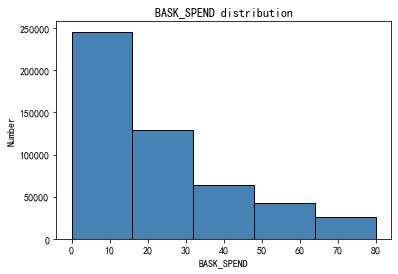

In [24]:
plt.hist(x = basket_new2.BASK_SPEND, # 指定绘图数据
          bins = 5, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色          
        )
# 添加x轴和y轴标签
plt.xlabel('BASK_SPEND')
plt.ylabel('Number')

plt.title('BASK_SPEND distribution')
 # 显示图形
plt.show()

由单笔订单金额的频数分布直方图可以观察到：单笔消费20元以内的订单数最多，即该超市的消费客户主要以购买小型商品为主，并且喜欢进行少量多次的消费。<br/>
因此可以分析得到顾客前往此商店的目的多是进行应急物品的购买，商店应选择应急物品为主要销售内容。

### 3.3产品分析

In [21]:
item_new2['year'] = item_new2['SDATE'].dt.year          
item_new2['month'] = item_new2['SDATE'].dt.month
item_new2['day']= item_new2['SDATE'].values.astype('datetime64[D]')#方便后续的分析，新增加年份列和月份列

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [22]:
#按商品货号分组，对商品数量进行求和，从大到小进行排序，得到销售量前十的商品
a=item_new2.groupby('PROD_CODE')['ITEM_QUANTITY'].sum().reset_index().sort_values(by = 'ITEM_QUANTITY',ascending = False)#商店按消费额大小排序
a.head(10)

,PROD_CODE,ITEM_QUANTITY
8527,149413,37718.000
5316,86772,28661.000
17199,220834,24139.000
1478,7133,21673.000
3883,61623,21318.000
7131,124556,18775.000
12010,194690,18119.336
301,1152,17679.000
7129,124554,15717.000
1480,7137,15284.000


In [39]:
#按商品货号分组，对销售金额进行求和，从大到小进行排序，得到交易额前十的商品
item_new2['sales'] = item_new2['ITEM_QUANTITY']*item_new2['ITEM_SPEND']
b=item_new2.groupby('PROD_CODE')['sales'].sum().sort_values(ascending=False)
b.head(10)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


PROD_CODE
220834    6.570246e+07
149413    5.511544e+07
7137      5.361133e+07
101421    4.113461e+07
11929     3.062564e+07
7133      2.570728e+07
220320    1.659394e+07
199639    1.496307e+07
1157      1.232104e+07
199628    1.165345e+07
Name: sales, dtype: float64

客单价，即平均交易金额，是指平均每个客户交易金额，客单价等于成交金额/成交用户数。
销售额是由客单价和用户数所决定的，要提升产品的销售额，除了尽可能多地吸引客流，增加顾客交易次数以外，提高客单价也是非常重要的途径。

In [40]:
sumPrice=item_new2['sales'].sum()
countID=item_new2['SDATE'].count()
avgPrice = sumPrice/countID
print(avgPrice)

319.065685439069


In [25]:
c=item_new2.groupby('DISCOUNT_TYPE')['ITEM_SPEND'].sum().reset_index().sort_values(by = 'ITEM_SPEND',ascending = False)#销售量按照折扣进行分组并进行大小排序
c

,DISCOUNT_TYPE,ITEM_SPEND
3,n,1.370020e+07
4,p,4.992203e+06
2,m,1.954608e+06
7,v,1.910762e+05
8,x,9.161940e+04
5,q,4.618240e+04
0,Z,2.479515e+04
6,s,9.228600e+02
1,h,2.150000e+01


In [26]:
d=item_new2.groupby('DISCOUNT_TYPE')['ITEM_QUANTITY'].sum().reset_index().sort_values(by = 'ITEM_QUANTITY',ascending = False)#销售量按照折扣进行分组并进行大小排序
d

,DISCOUNT_TYPE,ITEM_QUANTITY
3,n,1496483.291
4,p,462191.611
2,m,265343.962
7,v,13264.000
8,x,9687.000
0,Z,2164.472
5,q,1122.000
6,s,224.506
1,h,1.000


In [27]:
grouped_Customer = item_new2[['BASK_CODE','SDATE', 'ITEM_QUANTITY', 'sales', 'month']].sort_values(['SDATE']).groupby('BASK_CODE')

用户的第一次购买日期分布

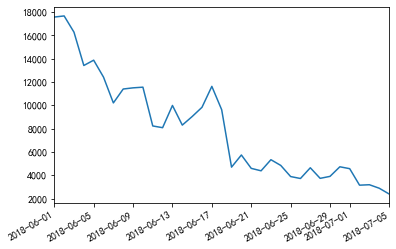

In [28]:
grouped_Customer.min().SDATE.value_counts().plot()   #用户的第一次购买日期分布，可以看出在7月之后用户增长缓慢

用户最后一次购买日期分布

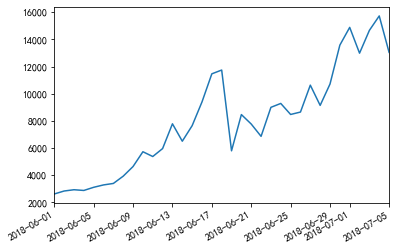

In [29]:
grouped_Customer.max().SDATE.value_counts().plot()   #用户最后一次购买日期分布,发现用户基本没有流失，也验证了每年销售额的增长趋势

用户第一次购买的时间多集中在6月的上半月，最后一次购买时间多集中与7月份，因此该超市的顾客多为回头客。因此应注重服务质量以及控制零售品价格，以达到挽留更多老顾客的目的。

新老客户占比

In [30]:
# 统计每个客户第一次和最后一次购买记录
Customer_life = grouped_Customer.SDATE.agg(['min','max'])
# 查看只有一次购买记录的顾客数量，第一次和最后一次是同一条记录，则说明购买只有一次(这里将一个购物篮看做一个顾客)
(Customer_life['min'] == Customer_life['max']).value_counts()

False    169532
True     111282
dtype: int64

([<matplotlib.patches.Wedge at 0x22c075492b0>,
 [Text(-0.35210934383272846, 1.042122358452061, 'False'),
  Text(0.35210924626219015, -1.0421223914189122, 'True')],
 [Text(-0.19205964209057913, 0.5684303773374877, '60.37%'),
  Text(0.1920595888702855, -0.5684303953194066, '39.63%')])

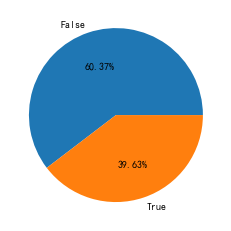

In [31]:
plt.pie((Customer_life['min'] == Customer_life['max']).value_counts(normalize = True),
       autopct='%.2f%%',
       labels = (Customer_life['min'] == Customer_life['max']).value_counts().index)

### 3.4RFM模型分析

R是指用户的最近一次消费时间，这个指标与用户流失和复购直接相关

F是指用户下单频率，反应用户的消费活跃度

M是用户消费金额，反应用户对商店贡献的价值

（1）构建RFM表

In [32]:
rfm = item_new2.pivot_table(index='BASK_CODE',
                            values = ["ITEM_QUANTITY","sales","SDATE"],
                            aggfunc={"ITEM_QUANTITY":"sum","sales":"sum","SDATE":"max"})

# 所有用户最大的交易日期为标准，求每笔交易的时间间隔即为R
rfm['R'] = (rfm.SDATE.max() - rfm.SDATE)/np.timedelta64(1,'D')
# 每个客户的总销量即为F，总销售额即为M
rfm.rename(columns={'ITEM_QUANTITY':'F','sales':'M'},inplace = True)
rfm.head()

,F,SDATE,M,R
BASK_CODE,,,,
961,1.0,2018-06-18,25.0,17.0
962,11.0,2018-06-18,132.1,17.0
964,1.0,2018-06-18,14.0,17.0
965,1.0,2018-06-18,20.0,17.0
966,1.0,2018-06-18,12.5,17.0


（2）对客户价值进行标注，将客户分为8个等级

In [33]:
# 基于平均值做比较，超过均值为1，否则为0
rfm[['R','F','M']].apply(lambda x:x-x.mean())

def rfm_func(x):
    level =x.apply(lambda x:'1'if x>0 else '0')
    level =level.R +level.F +level.M
    d = {
        "111":"重要价值客户",
        "011":"重要保持客户",
        "101":"重要挽留客户",
        "001":"重要发展客户",
        "110":"一般价值客户",
        "010":"一般保持客户",
        "100":"一般挽留客户",
        "000":"一般发展客户"
    }
    result = d[level]
    return result

rfm['label']= rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis =1)
rfm.head()

,F,SDATE,M,R,label
BASK_CODE,,,,,
961,1.0,2018-06-18,25.0,17.0,一般挽留客户
962,11.0,2018-06-18,132.1,17.0,重要价值客户
964,1.0,2018-06-18,14.0,17.0,一般挽留客户
965,1.0,2018-06-18,20.0,17.0,一般挽留客户
966,1.0,2018-06-18,12.5,17.0,一般挽留客户


（3）重要价值客户和非重要价值客户进行可视化展示

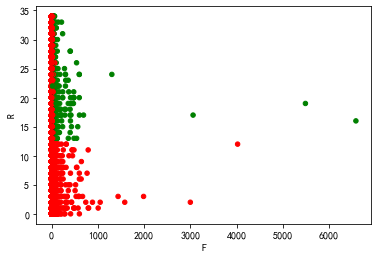

In [34]:
rfm.loc[rfm.label=='重要价值客户','color']='g'
rfm.loc[~(rfm.label=='重要价值客户'),'color']='r'
rfm.plot.scatter('F','R',c= rfm.color)       #从图中可以看出交易频率很高